<a href="https://colab.research.google.com/github/firarru/Text-Mining/blob/main/Tugas_3_Kelompok_4_Text_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Package**

In [1]:
import pandas as pd
import re
import ast
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# **Read Data**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/refs/heads/master/dataset_tweet_sentimen_tayangan_tv.csv')
df.head()

,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
0,1,positive,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S..."
1,2,positive,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...
2,3,positive,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar..."
3,4,positive,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih
4,5,positive,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              400 non-null    int64 
 1   Sentiment       400 non-null    object
 2   Acara TV        400 non-null    object
 3   Jumlah Retweet  400 non-null    int64 
 4   Text Tweet      400 non-null    object
dtypes: int64(2), object(3)
memory usage: 15.8+ KB


In [4]:
df = df[['Sentiment', 'Text Tweet']]
df.shape

(400, 2)

Sentiment
positive    200
negative    200
Name: count, dtype: int64


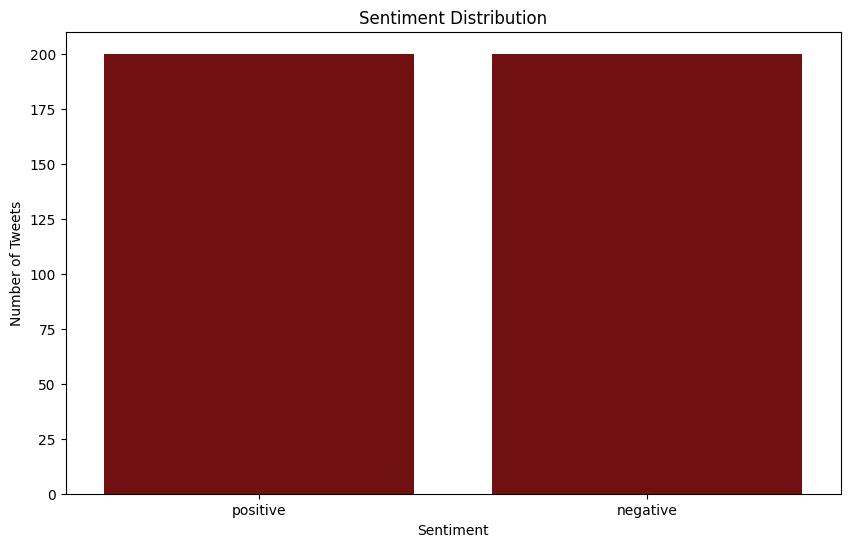

In [5]:
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, color='maroon')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

## A. Case Folding

In [6]:
def convert_text(text):
    try:
        teks = ast.literal_eval(text)
        return " ".join([word.lower() for word in teks]) # Convert to lowercase here
    except (ValueError, SyntaxError):
        if isinstance(text, str):
          return " ".join([word.lower() for word in text.split()]) # Handle string cases
        return text # Return original text if conversion fails

df['Text Tweet'] = df['Text Tweet'].apply(convert_text)

In [7]:
# df['Text Tweet'].tolist()

## B. Cleaning

In [8]:
import re

def clean_text(text):
    text = re.sub(r'#\w+', '', text) #remove hashtag
    text = re.sub(r'\b\w*\d\w*\b', '', text) #remove words with numbers in the middle
    text = re.sub(r'@\w+', '', text) #remove mentions (@username)
    text = re.sub(r'https?://\S+|www\.\S+', '', text) #remove URLs
    #remove emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) #remove special characters (keep only alphanumeric and spaces)
    return text

df['Text Tweet'] = df['Text Tweet'].apply(clean_text)

In [9]:
df['Text Tweet'].tolist()[:30]

['undang  ke hitamputih pemenang ssk  harusnya  ini lebih layak di undang karena prestasinya',
 'selamat berbuka puasa semoga amal ibadah hari ni diterima allah ',
 'ada nih di  hitam putih dia dpt penghargaan juga di norwegia ',
 'selamat ya mas  masuk hitamputih',
 'asiknya nonton hitam putih ',
 ' acara paling komplit dan menarik apalagi ada hitam putih',
 'hitam putih  inspiratif banget',
 'suka banget dengan acara hitam putih',
 'keren lu bro ',
 'tadi ada yg liat hitam putih di  ga ada sanggu ganteng',
 'cinta mengikat silaturahmi di hati     ',
 'terima kasih pak sudah mau membantu kami untuk menyekolahkan adik saya ',
 'semoga lancar ',
 ' hitam putih terbaik ',
 'acara hitam putih paling bagus buat di lihat',
 ' undang  di acara hitam putih yadia jebolan dangdut academi pinter nyanyi lagu india suaranya keren',
 'bagus rancangan seperti ini di  hitamputih  dakwah hiburannya terima kasih ustadz wijayanto',
 'wah kapan rihanna bisa jadi bintang tamu hitam putih kayak di  jadi ka

In [10]:
df = df[['Text Tweet', 'Sentiment']]
df.head(20)

,Text Tweet,Sentiment
0,undang ke hitamputih pemenang ssk harusnya ...,positive
1,selamat berbuka puasa semoga amal ibadah hari ...,positive
2,ada nih di hitam putih dia dpt penghargaan ju...,positive
3,selamat ya mas masuk hitamputih,positive
4,asiknya nonton hitam putih,positive
5,acara paling komplit dan menarik apalagi ada ...,positive
6,hitam putih inspiratif banget,positive
7,suka banget dengan acara hitam putih,positive
8,keren lu bro,positive
9,tadi ada yg liat hitam putih di ga ada sanggu...,positive


## C. Tokenizing

In [11]:
#Menggunakan Split
df['Text Tweet'].apply(lambda x: x.split())

,Text Tweet
0,"[undang, ke, hitamputih, pemenang, ssk, harusn..."
1,"[selamat, berbuka, puasa, semoga, amal, ibadah..."
2,"[ada, nih, di, hitam, putih, dia, dpt, penghar..."
3,"[selamat, ya, mas, masuk, hitamputih]"
4,"[asiknya, nonton, hitam, putih]"
...,...
395,"[ini, apa, banget, deh, gw, paling, kesel, klo..."
396,"[orang, miskin, semakin, miskin, klo, sekolah,..."
397,"[ga, boleh, emosi, cepat, tua, nonton, lihat, ..."
398,"[dr, penampilan, saja, kyk, preman, taunya, bk..."


In [12]:
#Menggunakan tokenize
nltk.download('punkt_tab')
df['Tokenize'] = df['Text Tweet'].apply(word_tokenize)
df

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Text Tweet,Sentiment,Tokenize
0,undang ke hitamputih pemenang ssk harusnya ...,positive,"[undang, ke, hitamputih, pemenang, ssk, harusn..."
1,selamat berbuka puasa semoga amal ibadah hari ...,positive,"[selamat, berbuka, puasa, semoga, amal, ibadah..."
2,ada nih di hitam putih dia dpt penghargaan ju...,positive,"[ada, nih, di, hitam, putih, dia, dpt, penghar..."
3,selamat ya mas masuk hitamputih,positive,"[selamat, ya, mas, masuk, hitamputih]"
4,asiknya nonton hitam putih,positive,"[asiknya, nonton, hitam, putih]"
...,...,...,...
395,ini apa banget deh gw paling kesel klo pada d...,negative,"[ini, apa, banget, deh, gw, paling, kesel, klo..."
396,orang miskin semakin miskin klo sekolah melaku...,negative,"[orang, miskin, semakin, miskin, klo, sekolah,..."
397,ga boleh emosi cepat tua nonton lihat bapak ...,negative,"[ga, boleh, emosi, cepat, tua, nonton, lihat, ..."
398,dr penampilan saja kyk preman taunya bkin kisr...,negative,"[dr, penampilan, saja, kyk, preman, taunya, bk..."


## D. Menghapus Stopword

In [13]:
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))
df['Stopword'] = df['Tokenize'].apply(lambda x: [word for word in x if word.lower() not in stop_words])
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Text Tweet,Sentiment,Tokenize,Stopword
0,undang ke hitamputih pemenang ssk harusnya ...,positive,"[undang, ke, hitamputih, pemenang, ssk, harusn...","[undang, hitamputih, pemenang, ssk, layak, und..."
1,selamat berbuka puasa semoga amal ibadah hari ...,positive,"[selamat, berbuka, puasa, semoga, amal, ibadah...","[selamat, berbuka, puasa, semoga, amal, ibadah..."
2,ada nih di hitam putih dia dpt penghargaan ju...,positive,"[ada, nih, di, hitam, putih, dia, dpt, penghar...","[nih, hitam, putih, dpt, penghargaan, norwegia]"
3,selamat ya mas masuk hitamputih,positive,"[selamat, ya, mas, masuk, hitamputih]","[selamat, ya, mas, masuk, hitamputih]"
4,asiknya nonton hitam putih,positive,"[asiknya, nonton, hitam, putih]","[asiknya, nonton, hitam, putih]"
...,...,...,...,...
395,ini apa banget deh gw paling kesel klo pada d...,negative,"[ini, apa, banget, deh, gw, paling, kesel, klo...","[banget, deh, gw, kesel, klo, debat, pake, emo..."
396,orang miskin semakin miskin klo sekolah melaku...,negative,"[orang, miskin, semakin, miskin, klo, sekolah,...","[orang, miskin, miskin, klo, sekolah, pungutan..."
397,ga boleh emosi cepat tua nonton lihat bapak ...,negative,"[ga, boleh, emosi, cepat, tua, nonton, lihat, ...","[ga, emosi, cepat, tua, nonton, lihat, emosi, ..."
398,dr penampilan saja kyk preman taunya bkin kisr...,negative,"[dr, penampilan, saja, kyk, preman, taunya, bk...","[dr, penampilan, kyk, preman, taunya, bkin, ki..."


In [14]:
custom_stopword = ['dpt', 'yg', 'ga', 'kyk', 'nya', 'nih', 'dr', 'klo', 'utk', 'tdk', 'dg', 'bs', 'krn', 'org', 'mw', 'km', 'sbg', 'g', 'dgn']
df['Stopword'] = df['Stopword'].apply(lambda x: [word for word in x if word.lower() not in custom_stopword])
df

,Text Tweet,Sentiment,Tokenize,Stopword
0,undang ke hitamputih pemenang ssk harusnya ...,positive,"[undang, ke, hitamputih, pemenang, ssk, harusn...","[undang, hitamputih, pemenang, ssk, layak, und..."
1,selamat berbuka puasa semoga amal ibadah hari ...,positive,"[selamat, berbuka, puasa, semoga, amal, ibadah...","[selamat, berbuka, puasa, semoga, amal, ibadah..."
2,ada nih di hitam putih dia dpt penghargaan ju...,positive,"[ada, nih, di, hitam, putih, dia, dpt, penghar...","[hitam, putih, penghargaan, norwegia]"
3,selamat ya mas masuk hitamputih,positive,"[selamat, ya, mas, masuk, hitamputih]","[selamat, ya, mas, masuk, hitamputih]"
4,asiknya nonton hitam putih,positive,"[asiknya, nonton, hitam, putih]","[asiknya, nonton, hitam, putih]"
...,...,...,...,...
395,ini apa banget deh gw paling kesel klo pada d...,negative,"[ini, apa, banget, deh, gw, paling, kesel, klo...","[banget, deh, gw, kesel, debat, pake, emosi, g..."
396,orang miskin semakin miskin klo sekolah melaku...,negative,"[orang, miskin, semakin, miskin, klo, sekolah,...","[orang, miskin, miskin, sekolah, pungutan, liar]"
397,ga boleh emosi cepat tua nonton lihat bapak ...,negative,"[ga, boleh, emosi, cepat, tua, nonton, lihat, ...","[emosi, cepat, tua, nonton, lihat, emosi, bicara]"
398,dr penampilan saja kyk preman taunya bkin kisr...,negative,"[dr, penampilan, saja, kyk, preman, taunya, bk...","[penampilan, preman, taunya, bkin, kisruh, per..."


## E. Stemming

In [15]:
pip install Sastrawi

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

df['Clean'] = df['Stopword'].apply(lambda x: [stemmer.stem(word) for word in x])
df